Problem 1

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/200, Training Loss: 1.5396, Validation Loss: 1.1717
Epoch 2/200, Training Loss: 1.1827, Validation Loss: 0.9812
Epoch 3/200, Training Loss: 1.0508, Validation Loss: 0.9143
Epoch 4/200, Training Loss: 0.9801, Validation Loss: 0.8833
Epoch 5/200, Training Loss: 0.9189, Validation Loss: 0.8414
Epoch 6/200, Training Loss: 0.8826, Validation Loss: 0.8328
Epoch 7/200, Training Loss: 0.8491, Validation Loss: 0.7823
Epoch 8/200, Training Loss: 0.8199, Validation Loss: 0.7473
Epoch 9/200, Training Loss: 0.7962, Validation Loss: 0.7656
Epoch 10/200, Training Loss: 0.7766, Validation Loss: 0.7478
Epoch 11/200, Training Loss: 0.7622, Validation Loss: 0.7143
Epoch 12/200, Training Loss: 0.7494, Validation Loss: 0.7280
Epoch 13/200, Training Loss: 0.7333, Validation Loss: 0.7216
Epoch 14/200, Training Loss: 0.7146, Validation Loss: 0.6972
Epoch 15/200, Training Loss: 0.7072, Validation Loss: 0.6908

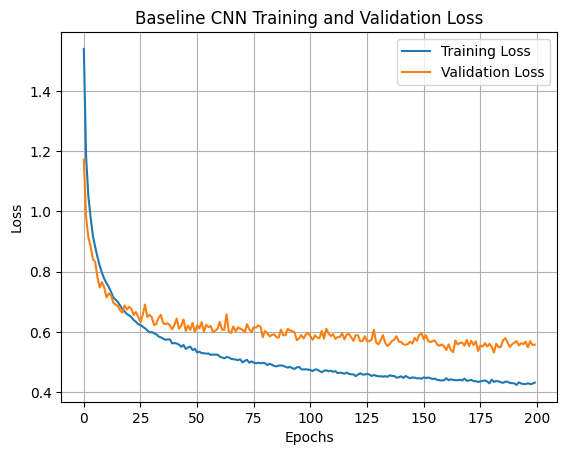

In [3]:
# a
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transformations for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Define the baseline CNN model
class BaselineCNN(nn.Module):
    def __init__(self):
        super(BaselineCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 256)  # Corrected feature size
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))             # Conv1 + ReLU
        x = self.pool(self.relu(self.conv2(x))) # Conv2 + Pool + ReLU
        x = x.view(x.size(0), -1)               # Flatten
        x = self.relu(self.fc1(x))              # Fully connected 1 + ReLU
        x = self.fc2(x)                         # Fully connected 2
        return x

# Train and evaluate the model
def train_evaluate(model, criterion, optimizer, train_loader, test_loader, epochs):
    model.to(device)  # Move model to GPU
    train_losses = []
    val_losses = []
    start_time = time.time()

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        val_loss /= len(test_loader)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    training_time = time.time() - start_time

    # Calculate final accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    accuracy = 100 * correct / total
    return train_losses, val_losses, training_time, accuracy

# Initialize the baseline model
model_a = BaselineCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_a.parameters(), lr=0.001, weight_decay=1e-4)

# Train the baseline model
train_losses_a, val_losses_a, training_time_a, accuracy_a = train_evaluate(
    model_a, criterion, optimizer, train_loader, test_loader, epochs=200
)

print(f"Baseline CNN Training Time: {training_time_a:.2f} seconds")
print(f"Baseline CNN Accuracy: {accuracy_a:.2f}%")

# Plot training and validation loss
plt.plot(train_losses_a, label="Training Loss")
plt.plot(val_losses_a, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Baseline CNN Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()


Epoch 1/200, Training Loss: 1.5460, Validation Loss: 1.2374
Epoch 2/200, Training Loss: 1.1461, Validation Loss: 0.9327
Epoch 3/200, Training Loss: 0.9494, Validation Loss: 0.8326
Epoch 4/200, Training Loss: 0.8431, Validation Loss: 0.7173
Epoch 5/200, Training Loss: 0.7721, Validation Loss: 0.6840
Epoch 6/200, Training Loss: 0.7181, Validation Loss: 0.7014
Epoch 7/200, Training Loss: 0.6785, Validation Loss: 0.6527
Epoch 8/200, Training Loss: 0.6338, Validation Loss: 0.6150
Epoch 9/200, Training Loss: 0.6152, Validation Loss: 0.5897
Epoch 10/200, Training Loss: 0.5862, Validation Loss: 0.5750
Epoch 11/200, Training Loss: 0.5659, Validation Loss: 0.5743
Epoch 12/200, Training Loss: 0.5416, Validation Loss: 0.5659
Epoch 13/200, Training Loss: 0.5275, Validation Loss: 0.5422
Epoch 14/200, Training Loss: 0.5149, Validation Loss: 0.5259
Epoch 15/200, Training Loss: 0.4998, Validation Loss: 0.5395
Epoch 16/200, Training Loss: 0.4892, Validation Loss: 0.5537
Epoch 17/200, Training Loss: 0.47

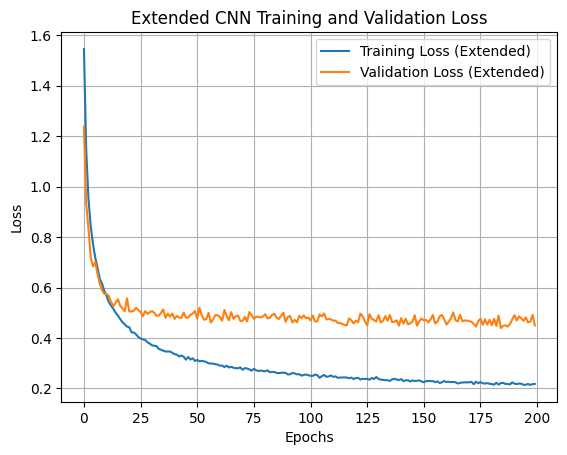

In [4]:
# b
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the extended CNN model
class ExtendedCNN(nn.Module):
    def __init__(self):
        super(ExtendedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Calculate the dimensions after pooling
        # Input: 3x32x32 -> Conv1: 32x32x32 -> Conv2: 64x32x32 -> Pool: 64x16x16
        # Conv3: 128x16x16 -> Pool: 128x8x8
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))             # Conv1 + ReLU
        x = self.pool(self.relu(self.conv2(x))) # Conv2 + Pool + ReLU
        x = self.pool(self.relu(self.conv3(x))) # Conv3 + Pool + ReLU
        x = x.view(x.size(0), -1)               # Flatten
        x = self.relu(self.fc1(x))              # Fully connected 1 + ReLU
        x = self.fc2(x)                         # Fully connected 2
        return x

# Initialize the extended model
model_b = ExtendedCNN().to(device)  # Move model to GPU
optimizer_b = optim.Adam(model_b.parameters(), lr=0.001, weight_decay=1e-4)

# Train the extended model
train_losses_b, val_losses_b, training_time_b, accuracy_b = train_evaluate(
    model_b, criterion, optimizer_b, train_loader, test_loader, epochs=200
)

print(f"Extended CNN Training Time: {training_time_b:.2f} seconds")
print(f"Extended CNN Accuracy: {accuracy_b:.2f}%")

# Plot training and validation loss
plt.plot(train_losses_b, label="Training Loss (Extended)")
plt.plot(val_losses_b, label="Validation Loss (Extended)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Extended CNN Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()


Problem 2

Epoch 1/200, Training Loss: 1.4419, Validation Loss: 1.1378
Epoch 2/200, Training Loss: 1.3559, Validation Loss: 1.0756
Epoch 3/200, Training Loss: 1.3012, Validation Loss: 1.0687
Epoch 4/200, Training Loss: 1.2401, Validation Loss: 1.0251
Epoch 5/200, Training Loss: 1.1893, Validation Loss: 0.9937
Epoch 6/200, Training Loss: 1.1395, Validation Loss: 0.9616
Epoch 7/200, Training Loss: 1.1168, Validation Loss: 0.9115
Epoch 8/200, Training Loss: 1.0744, Validation Loss: 0.8973
Epoch 9/200, Training Loss: 1.0182, Validation Loss: 0.8692
Epoch 10/200, Training Loss: 1.0022, Validation Loss: 0.8237
Epoch 11/200, Training Loss: 0.9745, Validation Loss: 0.8397
Epoch 12/200, Training Loss: 0.9564, Validation Loss: 0.8269
Epoch 13/200, Training Loss: 0.9187, Validation Loss: 0.7847
Epoch 14/200, Training Loss: 0.8834, Validation Loss: 0.7641
Epoch 15/200, Training Loss: 0.8523, Validation Loss: 0.7474
Epoch 16/200, Training Loss: 0.8418, Validation Loss: 0.7351
Epoch 17/200, Training Loss: 0.82

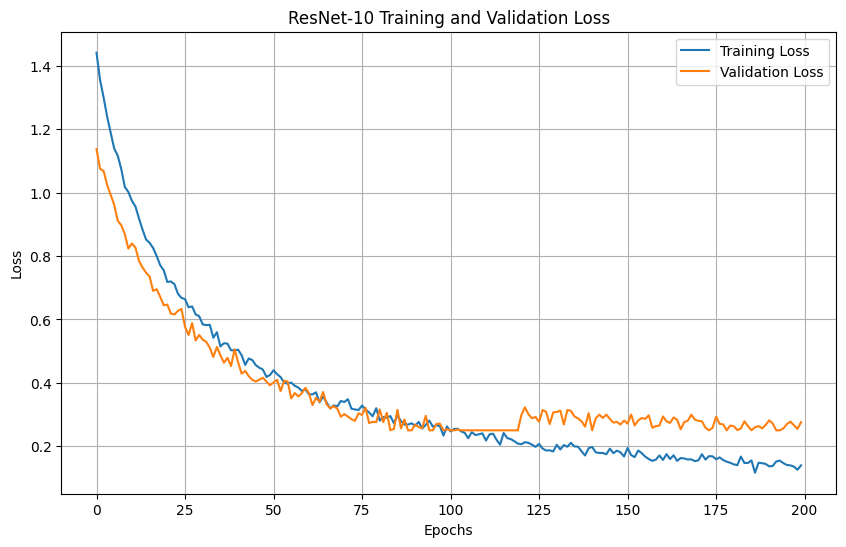

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# CIFAR-10 Dataset and DataLoader
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Define the ResNet-10 Model
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        out += identity
        out = self.relu(out)
        return out

class ResNet10(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet10, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Instantiate ResNet-10
def ResNet10Model():
    return ResNet10(ResidualBlock, [2, 2, 2, 2])

# Train and Evaluate Function
def train_evaluate(model, criterion, optimizer, train_loader, test_loader, epochs):
    model.to(device)  # Move model to GPU
    train_losses = []
    val_losses = []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        val_loss /= len(test_loader)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    training_time = time.time() - start_time

    # Calculate final accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    accuracy = 100 * correct / total
    return train_losses, val_losses, training_time, accuracy

# Initialize ResNet-10 Model
model_resnet10 = ResNet10Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet10.parameters(), lr=0.001, weight_decay=1e-4)

# Train the ResNet-10 model
train_losses_resnet10, val_losses_resnet10, training_time_resnet10, accuracy_resnet10 = train_evaluate(
    model_resnet10, criterion, optimizer, train_loader, test_loader, epochs=200
)

print(f"ResNet-10 Training Time: {training_time_resnet10:.2f} seconds")
print(f"ResNet-10 Accuracy: {accuracy_resnet10:.2f}%")

# Plot training and validation loss
plt.plot(train_losses_resnet10, label="Training Loss")
plt.plot(val_losses_resnet10, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ResNet-10 Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()
